# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

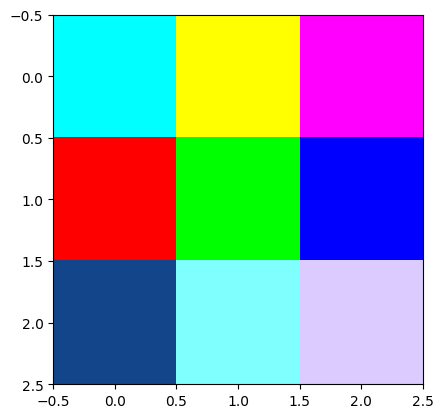

In [35]:
import numpy as np
import matplotlib.pyplot as plt

teste = np.array([[[0, 255, 255], [255, 255, 0], [255, 0, 255]],
                [[255, 0,0], [0, 255, 0], [0, 0, 255]],
                [[19, 69, 139], [128, 255, 255], [219, 203, 255]]])

# (RED, GREEN, BLUE)
plt.imshow(teste)

In [ ]:
import tkinter as tk
from PIL import Image, ImageTk
import numpy as np
import cv2
import random
import threading
import time

y1 = 100
y2 = 200
x1 = 100
x2 = 200

altura, largura = 300, 400
img_array = np.zeros((altura, largura, 3), dtype=np.uint8)


def atualizar_imagem():
    imagem_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    imagem_pil = Image.fromarray(imagem_rgb)
    imagem_tk = ImageTk.PhotoImage(imagem_pil)
    canvas.itemconfig(imagem_canvas, image=imagem_tk)
    canvas.image = imagem_tk  # Impede que a imagem seja coletada pelo garbage collector

def loop_em_thread():
    while True:
        # Gera uma cor BGR aleatória
        cor_aleatoria = [random.randint(0, 255) for _ in range(3)]

        # Aplica a cor em uma região da imagem
        img_array[0:len(img_array), 0:len(img_array[0])] = (0, 0, 0)
        img_array[y1:y2, x1:x2] = cor_aleatoria

        # Atualiza imagem na interface
        janela.after(0, atualizar_imagem)  # chama a atualização de forma segura no thread principal

        time.sleep(0.01)  # Espera 10ms

def tecla_pressionada(event):
    global x2, x1
    if event.char.lower() == 'w':
        x1 += 10
        x2 += 10
    if event.char.lower() == 's':
        x1 -= 10
        x2 -= 10

# Criar a imagem inicial
altura, largura = 300, 400
img_array = np.zeros((altura, largura, 3), dtype=np.uint8)

# Criar janela
janela = tk.Tk()
janela.title("Atualização com loop real (thread)")

# Converter imagem inicial
imagem_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
imagem_pil = Image.fromarray(imagem_rgb)
imagem_tk = ImageTk.PhotoImage(imagem_pil)

# Canvas
canvas = tk.Canvas(janela, width=largura, height=altura)
canvas.pack()
imagem_canvas = canvas.create_image(0, 0, anchor="nw", image=imagem_tk)

# Eventos
janela.bind("<Key>", tecla_pressionada)

# Inicia o loop em uma thread separada
thread_loop = threading.Thread(target=loop_em_thread, daemon=True)
thread_loop.start()

# Loop principal da janela
janela.mainloop()


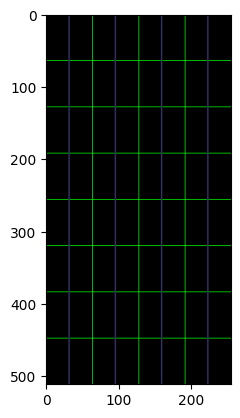

In [13]:
import numpy as np
import matplotlib.pyplot as plt

import cv2

def create_empy_script(altura:int, largura:int, size_script_pixels:int, name:str):
    ret = np.zeros(((altura)*size_script_pixels, (largura)*size_script_pixels, 3), dtype=np.uint8)
    for i in range((altura)*size_script_pixels):
        for j in range((largura)*size_script_pixels):
            if(i%size_script_pixels==0 or j%size_script_pixels==0):
                ret[i,j] = (0, 255, 0)
            if(j%size_script_pixels==int(size_script_pixels/2) or
            j%size_script_pixels==int((size_script_pixels-1)/2)):
                ret[i,j] = (50, 50, 100)
    return ret



sprite_base = create_empy_script(8, 4, 64, "teste")
plt.imsave('Base_para_desenhar_Sprites.png', sprite_base)

plt.imshow(sprite_base)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

sprite_teste = cv2.imread('imagem_com_plt.png')


    # return (sprite, actual_sprit_in_list, count_time)
def animacao(full_sprite, sprite_size, intent:list, actual_sprit_in_list, count_time):
    # intent element:
    #   [frames_count, sprite_X, sprite_Y, sprite_l, sprite_h]

    i = actual_sprit_in_list
    x = i+1
    if(i == len(intent)-1):
        x = 0
    a0, a1 = sprite_size*intent[x][1], sprite_size*(intent[x][3]+intent[x][1])
    b0, b1 = sprite_size*intent[x][2], sprite_size*(intent[x][4]+intent[x][2])
    print(a0, a1)
    print(b0, b1)

    if(count_time >= intent[i][0]):
        print("entrou 1", len(intent)-1)
        if(actual_sprit_in_list == len(intent)-1):
            print("end")
            actual_sprit_in_list = -1

        return (full_sprite
                    [a0:a1, b0:b1],
                actual_sprit_in_list+1, 0)
    else:
        print("fuk")
        return (full_sprite, i, count_time+1)


tmp = animacao(sprite_teste, 32, [[5, 0, 0, 1, 1], [15, 0, 0, 2, 1]], 1, 15)

plt.imshow(tmp[0])
print("retorno", tmp[1], tmp[2])



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

sprite_teste = cv2.imread('imagem_com_plt.png')


    # return (sprite, actual_sprit_in_list, count_time)
def animacao(full_sprite, sprite_size, intent:list, actual_sprit_in_list, count_time):
    # intent element:
    #   [frames_count, sprite_Y, sprite_X, sprite_l, sprite_h]

    x = actual_sprit_in_list
    ret_sprite = full_sprite
    if(count_time == 0):
        a0, a1 = sprite_size*intent[x][1], sprite_size*(intent[x][3]+intent[x][1])
        b0, b1 = sprite_size*intent[x][2], sprite_size*(intent[x][4]+intent[x][2])
        print(a0, a1)
        print(b0, b1)
        ret_sprite = full_sprite[a0:a1, b0:b1]


    if(count_time >= intent[actual_sprit_in_list][0]):
        if(actual_sprit_in_list == len(intent)-1):
            actual_sprit_in_list = -1
        return (ret_sprite, actual_sprit_in_list+1, 0)
    else:
        return (ret_sprite, actual_sprit_in_list, count_time+1)




tmp = animacao(sprite_teste, 32, [[5, 0, 0, 1, 1], [3, 1, 0, 1, 1], [7, 0, 0, 2, 1]], 2, 0)

plt.imshow(tmp[0])
print("retorno", tmp[1], tmp[2])



0 32
0 32
entrou 1 2
32 64
0 32
entrou 1 2
0 64
0 32
2 1


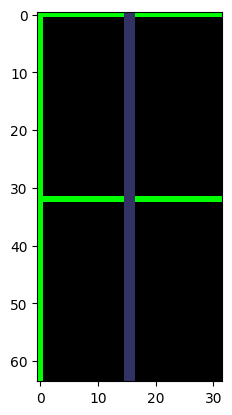

In [34]:
import matplotlib.pyplot as plt
import numpy as np

class Sprite:
    def __init__(self, full_sprite, posX, posY, father, actual_sprite=0, count_time=0, sprite_size = 32, visible = True):
        self.posX = posX
        self.posY = posY
        self.full_sprite = full_sprite
        self.father = father
        self.actual_sprite = actual_sprite
        self.count_time = count_time
        self.sprite_size = sprite_size
        self.visible = visible
        self.img_actual = full_sprite


    def simple_animation(self, intent):    # intent element:
    #   [frames_count, sprite_Y, sprite_X, sprite_l, sprite_h]

        x = self.actual_sprite
        if(self.count_time == 0):
            a0, a1 = self.sprite_size*intent[x][1], self.sprite_size*(intent[x][3]+intent[x][1])
            b0, b1 = self.sprite_size*intent[x][2], self.sprite_size*(intent[x][4]+intent[x][2])
            print(a0, a1)
            print(b0, b1)
            self.img_actual = self.full_sprite[a0:a1, b0:b1]


        if(self.count_time >= intent[self.actual_sprite][0]):
            print("entrou 1", len(intent)-1)
            self.count_time = 0
            self.actual_sprite = self.actual_sprite + 1
        else:
            self.count_time = self.count_time + 1

        if(self.actual_sprite > len(intent)-1):
            self.actual_sprite = 0

prot_sprite = Sprite(plt.imread('imagem_com_plt.png'), -50, -60, father=None)

prot_sprite.simple_animation([[5, 0, 0, 1, 1], [3, 1, 0, 1, 1], [7, 0, 0, 2, 1]])
prot_sprite.simple_animation([[5, 0, 0, 1, 1], [3, 1, 0, 1, 1], [7, 0, 0, 2, 1]])
prot_sprite.simple_animation([[5, 0, 0, 1, 1], [3, 1, 0, 1, 1], [7, 0, 0, 2, 1]])
prot_sprite.simple_animation([[5, 0, 0, 1, 1], [3, 1, 0, 1, 1], [7, 0, 0, 2, 1]])
prot_sprite.simple_animation([[5, 0, 0, 1, 1], [3, 1, 0, 1, 1], [7, 0, 0, 2, 1]])
prot_sprite.simple_animation([[5, 0, 0, 1, 1], [3, 1, 0, 1, 1], [7, 0, 0, 2, 1]])
prot_sprite.simple_animation([[5, 0, 0, 1, 1], [3, 1, 0, 1, 1], [7, 0, 0, 2, 1]])
prot_sprite.simple_animation([[5, 0, 0, 1, 1], [3, 1, 0, 1, 1], [7, 0, 0, 2, 1]])
prot_sprite.simple_animation([[5, 0, 0, 1, 1], [3, 1, 0, 1, 1], [7, 0, 0, 2, 1]])
prot_sprite.simple_animation([[5, 0, 0, 1, 1], [3, 1, 0, 1, 1], [7, 0, 0, 2, 1]])
prot_sprite.simple_animation([[5, 0, 0, 1, 1], [3, 1, 0, 1, 1], [7, 0, 0, 2, 1]])


print(prot_sprite.actual_sprite, prot_sprite.count_time)
plt.imshow(prot_sprite.img_actual)


In [ ]:
import tkinter as tk
from PIL import Image, ImageTk
import numpy as np
import cv2
import random
import threading
import time

# Flag de controle da tecla
w_pressionado = False

def atualizar_imagem():
    imagem_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    imagem_pil = Image.fromarray(imagem_rgb)
    imagem_tk = ImageTk.PhotoImage(imagem_pil)
    canvas.itemconfig(imagem_canvas, image=imagem_tk)
    canvas.image = imagem_tk  # Impede que a imagem seja coletada

def loop_em_thread():
    global img_array
    while True:
        if not w_pressionado:
            # Gera uma nova imagem aleatória
            img_array = np.zeros((altura, largura, 3), dtype=np.uint8)

            # Aplica uma cor aleatória em uma região
            cor_aleatoria = [random.randint(0, 255) for _ in range(3)]
            y1, y2 = 100, 200
            x1, x2 = 100, 200
            img_array[y1:y2, x1:x2] = cor_aleatoria

        janela.after(0, atualizar_imagem)
        time.sleep(0.01)  # Espera 10ms

def tecla_pressionada(event):
    global w_pressionado
    if event.keysym.lower() == 'w':
        w_pressionado = True
        # Aplica cor amarela em uma região
        img_array[50:250, 50:150] = [0, 255, 255]  # amarelo (BGR)
        atualizar_imagem()

def tecla_liberada(event):
    global w_pressionado
    if event.keysym.lower() == 'w':
        w_pressionado = False

# Criar imagem inicial
altura, largura = 300, 400
img_array = np.zeros((altura, largura, 3), dtype=np.uint8)

# Criar janela
janela = tk.Tk()
janela.title("Atualização condicional da imagem")

# Imagem inicial
imagem_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
imagem_pil = Image.fromarray(imagem_rgb)
imagem_tk = ImageTk.PhotoImage(imagem_pil)

# Canvas
canvas = tk.Canvas(janela, width=largura, height=altura)
canvas.pack()
imagem_canvas = canvas.create_image(0, 0, anchor="nw", image=imagem_tk)

# Eventos de teclado
janela.bind("<KeyPress>", tecla_pressionada)
janela.bind("<KeyRelease>", tecla_liberada)

# Inicia loop em thread
thread_loop = threading.Thread(target=loop_em_thread, daemon=True)
thread_loop.start()

# Loop principal
janela.mainloop()


In [ ]:
import tkinter as tk
from PIL import Image, ImageTk
import numpy as np
import cv2
import random
import threading
import time

# Estado da tecla W
w_pressionado = False

def atualizar_imagem():
    imagem_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    imagem_pil = Image.fromarray(imagem_rgb)
    imagem_tk = ImageTk.PhotoImage(imagem_pil)
    canvas.itemconfig(imagem_canvas, image=imagem_tk)
    canvas.image = imagem_tk  # Evita garbage collector

def loop_em_thread():
    global img_array
    while True:
        if not w_pressionado:
            # Gera uma nova imagem com cor aleatória em uma região
            cor_aleatoria = [random.randint(0, 255) for _ in range(3)]
            y1, y2 = 100, 200
            x1, x2 = 100, 200
            img_array[y1:y2, x1:x2] = cor_aleatoria

        # Atualiza a interface
        janela.after(0, atualizar_imagem)

        # Aguarda 0.01 segundos
        time.sleep(0.01)

def tecla_pressionada(event):
    global w_pressionado
    if event.char.lower() == 'w':
        w_pressionado = True
        img_array[50:250, 50:150] = [0, 255, 255]  # amarelo (BGR)
        atualizar_imagem()

def tecla_liberada(event):
    global w_pressionado
    if event.keysym.lower() == 'w':
        w_pressionado = False

# Criar imagem inicial
altura, largura = 300, 400
img_array = np.zeros((altura, largura, 3), dtype=np.uint8)

# Criar janela
janela = tk.Tk()
janela.title("Atualização com W pressionado")

# Converter imagem inicial
imagem_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
imagem_pil = Image.fromarray(imagem_rgb)
imagem_tk = ImageTk.PhotoImage(imagem_pil)

# Canvas
canvas = tk.Canvas(janela, width=largura, height=altura)
canvas.pack()
imagem_canvas = canvas.create_image(0, 0, anchor="nw", image=imagem_tk)

# Eventos de teclado
janela.bind("<KeyPress>", tecla_pressionada)
janela.bind("<KeyRelease>", tecla_liberada)

# Inicia o loop em uma thread separada
thread_loop = threading.Thread(target=loop_em_thread, daemon=True)
thread_loop.start()

# Loop principal da janela
janela.mainloop()


In [ ]:
import tkinter as tk
import keyboard  # pip install keyboard

teclas_pressionadas = set()

def verificar_teclas():
    global teclas_pressionadas

    teclas_atuais = set()

    # Captura todas as teclas conhecidas e verifica quais estão pressionadas
    for tecla in keyboard.all_modifiers.union(set('abcdefghijklmnopqrstuvwxyz0123456789')):
        if keyboard.is_pressed(tecla):
            teclas_atuais.add(tecla)

    if teclas_atuais != teclas_pressionadas:
        teclas_pressionadas.clear()
        teclas_pressionadas.update(teclas_atuais)
        print("Teclas pressionadas:", sorted(teclas_pressionadas))

    janela.after(100, verificar_teclas)

# Cria janela básica com Tkinter
janela = tk.Tk()
janela.title("Detecção de teclas")
janela.geometry("300x100")

# Inicia loop de verificação periódica
verificar_teclas()
janela.mainloop()


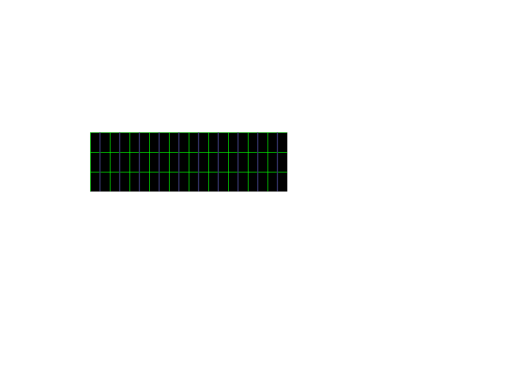

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

altura, largura = 600, 800

def renderizar():
    tela = np.zeros((altura, largura, 4), dtype="uint8")
    posX, posY = 130, 200

    tmp = (plt.imread('imagem_com_plt.png') * 255).astype("uint8")
    shape = tmp.shape

    tela[posY:posY+shape[0], posX:posX+shape[1]] = tmp

    return tela

ret = renderizar()
plt.imshow(ret)
plt.axis('off')  # Opcional, para esconder os eixos
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import cv2

tela = np.zeros((1024, 1024))

tmp = np.array([
    [2, 1, 4],
    [1, 2, 0],
    [0, 2, 3]
], dtype=np.uint8)
img_resized  = cv2.resize(tmp, (200, 150), interpolation=cv2.INTER_AREA)

img_normalizada = (img_resized.astype(np.float32) / img_resized.max()) * 255
img_normalizada = img_normalizada.astype(np.uint8)

tela[200:200+150, 300:300+200] = img_normalizada

plt.imshow(tela, cmap='gray', vmin=0, vmax=255)
print(tela[10][10])